In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.special import logsumexp

from scipy.special import logsumexp
from scipy.signal import correlate
from statsmodels.tsa.stattools import acf
import morphZ
import corner

In [2]:

def dens_evaluate(post_samples):
        
        li = list(post_samples.keys())
        ran_samples = np.zeros((len(post_samples.get(li[0])),len(li)))
        
        for j in range(len(li)):

              ran_samples[:,j]=post_samples.get(li[j])
              
        return ran_samples
def log_plus(x,y):
    
    if x > y:
      summ = x + np.log(1+np.exp(y-x))
    else:
        summ = y + np.log(1+np.exp(x-y))
    return summ

def log_sum(vec): 
    r = -np.Inf
    for i in range(len(vec)):
       #print('element:',vec[i])
       r =log_plus(r, vec[i])
       #print(r)
    return r



In [3]:

def lnlikefn(x):
        u = 0.01
        v = 0.1
        x1 = np.sum(-(x**2)/(2*v**2))-len(x)*np.log(np.sqrt(2*np.pi)*v)
        #print(x1)
        x2 = np.sum(-((x-0)**2)/(2*u**2))-len(x)*np.log(np.sqrt(2*np.pi)*u)#+np.log(100)
        #print(x2)
        return log_plus(x1,x2)

def lnpriorfn(x):

    if np.any((x < -0.5) | (x > 0.5)):  # Check if x is outside the cube
        return -np.inf 

    return 0.0 

def lnprobfn(x):
    return lnlikefn(x) + lnpriorfn(x)



In [4]:
import numpy as np
import dynesty
from dynesty import utils as dyfunc

ndim = 10  # number of parameters/dimensions
nlive = 15 * ndim  # number of live points (analogous to nwalkers)



# Define the prior transform: maps a unit cube (0,1) to the prior volume.
# For a uniform prior between -0.5 and 0.5 for each parameter:
def prior_transform(u):
    # u is a 1D array of ndim values in [0, 1]
    return -0.5 + u  # scales u to [-0.5, 0.5]

# Create the nested sampler instance.

# Run the nested sampling.
# Note: print_progress=True shows the progress.
NN = 1

log_z_NS = np.zeros(NN)
log_z_NS_err = np.zeros(NN)

for i in range(NN):
    sampler = dynesty.NestedSampler(lnlikefn, prior_transform, ndim, nlive=nlive)
    sampler.run_nested(dlogz=0.0001, maxiter=2000000,print_progress=True)
    res = sampler.results
    log_z_NS[i] = res.logz[-1]
    log_z_NS_err[i] = res.logzerr[-1]


# Get posterior samples.
# dynesty provides weighted samples; here we compute equal-weight samples.
samples, weights = res.samples, np.exp(res.logwt - res.logz[-1])
posterior_samples = dyfunc.resample_equal(samples, weights)



0it [00:00, ?it/s]

6796it [00:07, 908.91it/s, +150 | bound: 275 | nc: 1 | ncall: 193785 | eff(%):  3.587 | loglstar:   -inf < 36.750 <    inf | logz:  0.810 +/-  0.358 | dlogz:  0.000 >  0.000]


Posterior samples shape: (6946, 10)
NS log(z): 0.8104368017622398 +/- 0.3580794937595536


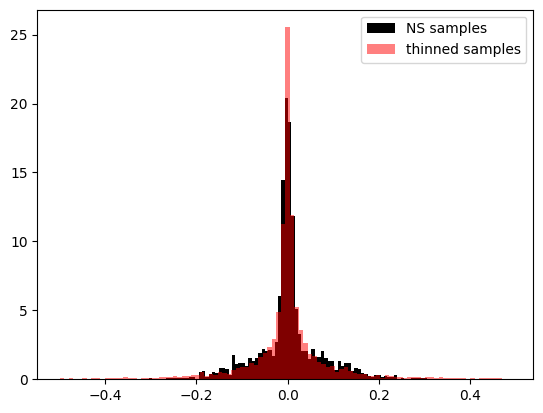

In [5]:
print("Posterior samples shape:", posterior_samples.shape)
plt.hist(posterior_samples[:,4],color='black',density=True ,bins=100,label='NS samples')
plt.hist(samples[:,4],color='red',density=True ,bins=100,alpha=0.5,label='thinned samples')
# plt.hist(tree_samples[:,2],color='blue',density=True ,bins=100,alpha=0.5,label='tree samples')

plt.legend()
print(f'NS log(z): {res.logz[-1]} +/- {res.logzerr[-1]}')


In [18]:
samples = posterior_samples[::4,:]  # total_samples[::20,:]
tot_len , ndim = samples.shape
print('Total samples:', tot_len, 'Dimensions:', ndim)
log_prob = np.zeros(tot_len)

for i in range(tot_len):
    log_prob[i] = lnprobfn(samples[i,:])

log_p_estimate = morphZ.evidence(
samples,
log_prob,
lnprobfn,
n_resamples=4000,
thin=1,n_estimations=5,morph_type="indep",kde_bw="silverman" ,output_path='./morphZ_peak_sampling_new')
#print('True:', np.log(2))
print('True for 1 amp peak:', np.log(2))


Total samples: 1737 Dimensions: 10

Using independent KDE for proposal distribution.

Estimation 1/5
Evaluating target distribution: 4000/4000
Filtered proposal samples: 4000 valid samples out of 4000 total samples.
 iteration: 4 log(z) old: 0.6942066244821969 log(z) New: 0.6942110660760852
Converged in 4 iterations. log(z): 0.6942 +/-: 0.0613
Estimation 2/5
Evaluating target distribution: 4000/4000
Filtered proposal samples: 4000 valid samples out of 4000 total samples.
 iteration: 4 log(z) old: 0.6681325015736297 log(z) New: 0.6681392666319859
Converged in 4 iterations. log(z): 0.6681 +/-: 0.0619
Estimation 3/5
Evaluating target distribution: 4000/4000
Filtered proposal samples: 4000 valid samples out of 4000 total samples.
 iteration: 4 log(z) old: 0.5944215375443855 log(z) New: 0.594414389454283534
Converged in 4 iterations. log(z): 0.5944 +/-: 0.0608
Estimation 4/5
Evaluating target distribution: 4000/4000
Filtered proposal samples: 4000 valid samples out of 4000 total samples.
 i

In [ ]:
print(f"r \n t")

r 
 t


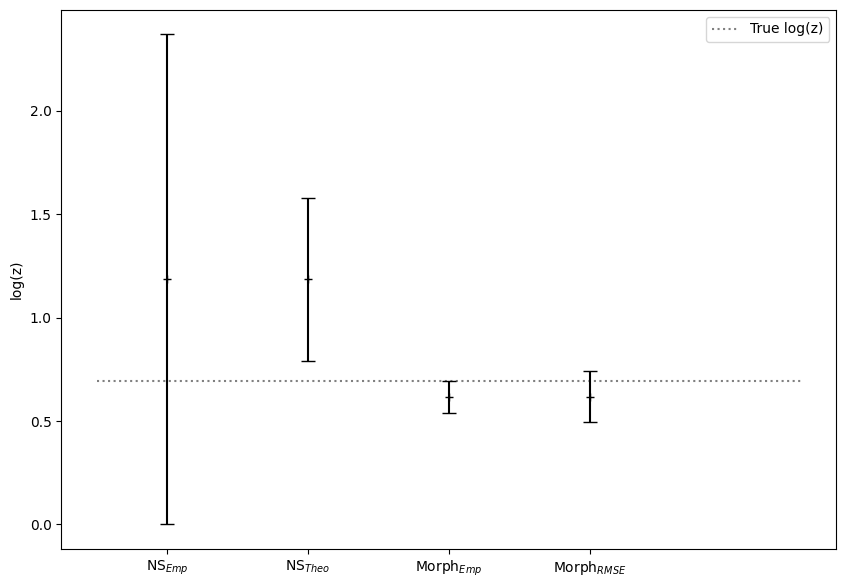

In [ ]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

log_p_estimate = np.array(log_p_estimate)
true_z = np.log(2)
plt.hlines(y=true_z,colors='grey',linestyle='dotted',xmin=0.5, xmax=5.5,label='True log(z)')

x1= [1,2,3,4]
#median = [np.mean(z_GSS_mcmc),res.logz[-1],np.mean(log_p_estimate)]
#error = [np.std(z_GSS_mcmc),res.logzerr[-1],np.std(log_p_estimate)]
median = [np.mean(log_z_NS),np.mean(log_z_NS),np.mean(log_p_estimate[:,0]),np.mean(log_p_estimate[:,0])]
error = [np.mean(log_z_NS),np.mean(log_z_NS_err),np.std(log_p_estimate[:,0]),np.mean(log_p_estimate[:,1])]
ax.errorbar(x1, median, yerr=error, fmt='+', color='black', capsize=5)


ax.set_xticks(x1,labels=[r'NS$_{Emp}$',r'NS$_{Theo}$', r'Morph$_{Emp}$',r'Morph$_{RMSE}$'],fontsize=10)
ax.set_ylabel('log(z)')
ax.legend()

In [ ]:

# for row in total_samples: 
#     np.random.shuffle(row)
    
samples = posterior_samples[::5,:]  # total_samples[::20,:]
tot_len , ndim = samples.shape
log_prob = np.zeros(tot_len)

for i in range(tot_len):
    log_prob[i] = lnprobfn(samples[i,:])


print(f'Ncal {tot_len} Ndim {ndim}, log prob {len(log_prob)}')
N_new = 10000
target_kde = KDE_approx(samples[:int(tot_len/2),:])

NN = 25
log_p_estimate = np.zeros((NN,3))
samples_mor = samples[int(tot_len/2):,:]
log_post = log_prob[int(tot_len/2):]
print(samples_mor.shape)

for gg in range(NN):
    print(f"Iteration : {gg+1}\n",end="")
    samples_prop = target_kde.resample(N_new)
    log_prop = target_kde.logpdf_kde(samples_prop)

    log_p_estimate[gg,:] , log_z = bridge_sampling_ln(lnprobfn, target_kde.logpdf_kde, samples_mor,log_post, samples_prop)

print(f'\n true:{np.log(2)}' )

Ncal 7326 Ndim 20, log prob 7326
(3663, 20)
Iteration : 1
 Iteration 10000 out of 10000masking
Bridging
 iteration: 5 log(z): 0.7535377446696243 +/-: 0.007806498579659941Iteration : 2
 Iteration 10000 out of 10000masking
Bridging
 iteration: 5 log(z): 0.6865023030098358 +/-: 0.007774748698283262Iteration : 3
 Iteration 10000 out of 10000masking
Bridging
 iteration: 7 log(z): 0.5121331643625542 +/-: 0.007665364797213775Iteration : 4
 Iteration 10000 out of 10000masking
Bridging
 iteration: 6 log(z): 0.8294636061998419 +/-: 0.007861863079176959Iteration : 5
 Iteration 10000 out of 10000masking
Bridging
 iteration: 4 log(z): 0.7351449245568489 +/-: 0.00779891358250357Iteration : 6
 Iteration 10000 out of 10000masking
Bridging
 iteration: 5 log(z): 0.7387965963415457 +/-: 0.0078013018806903965Iteration : 7
 Iteration 10000 out of 10000masking
Bridging
 iteration: 5 log(z): 0.555775237545391 +/-: 0.007699544745325226Iteration : 8
 Iteration 10000 out of 10000masking
Bridging
 iteration: 5 l

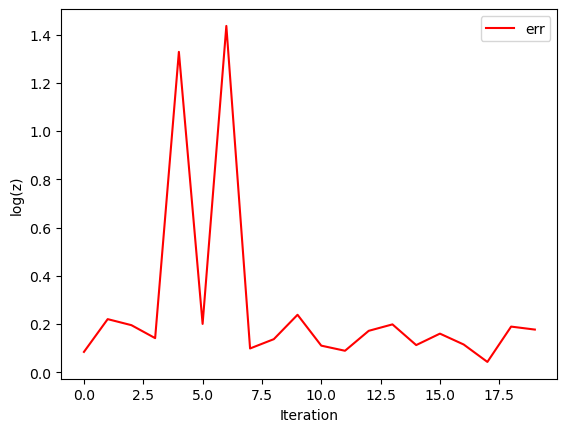

In [ ]:
#plt.plot(log_z,'r',label='log(z)')
plt.plot(log_p_estimate[:,2],'r',label='err')
#plt.axhline(y=np.log(2), color='g', linestyle='--',label='True log(z)')

plt.xlabel('Iteration')
plt.ylabel('log(z)')
plt.legend()

Posterior samples shape: (36628, 20)
NS log(z): 1.278191353345487 +/- 0.3447939105237096
true log(z): 0.6931471805599453


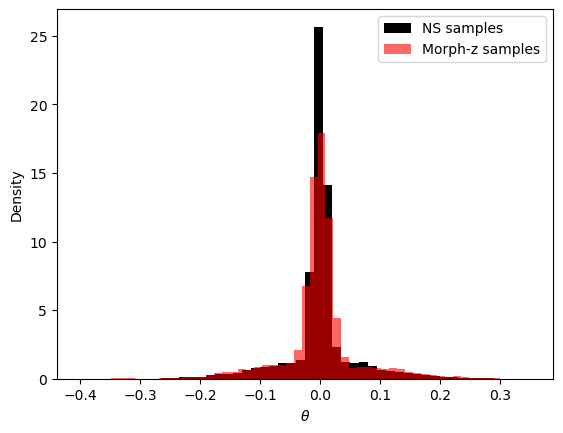

In [ ]:
# Now, posterior_samples is a (N, ndim) array of samples.
print("Posterior samples shape:", posterior_samples.shape)
resampled = target_kde.resample(30000)
ii = 0
plt.hist(posterior_samples[:,ii],color='black',density=True ,bins=50,label='NS samples')
plt.hist(resampled[ii,:],color='red',density=True ,bins=50,alpha=0.6,label='Morph-z samples')
#plt.hist(samples[:int(tot_len/2),1],color='red',density=True ,bins=100,alpha=0.7,label='Morph-KDE samples')
plt.ylabel('Density')
plt.xlabel(r'$\theta$')
plt.legend()
plt
print(f'NS log(z): {res.logz[-1]} +/- {res.logzerr[-1]}')

print('true log(z):', np.log(2))

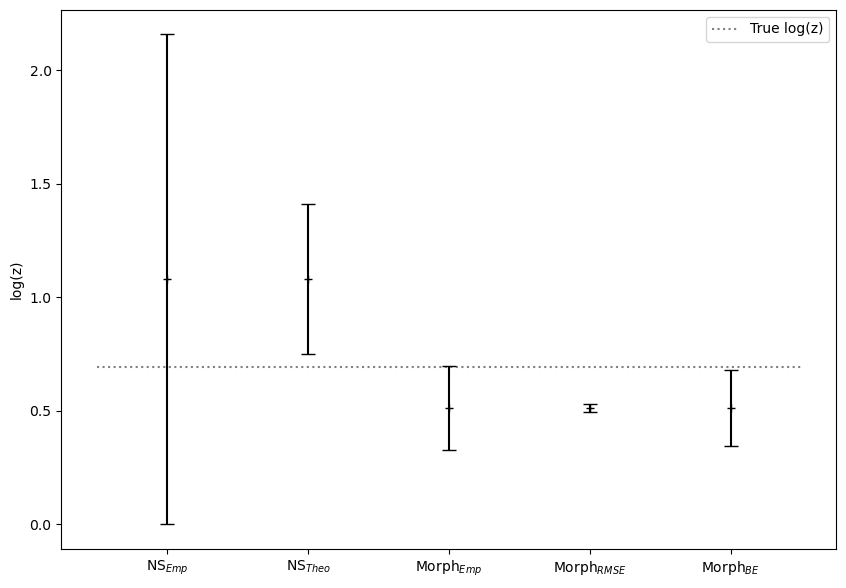

In [ ]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)


true_z = np.log(2)
plt.hlines(y=true_z,colors='grey',linestyle='dotted',xmin=0.5, xmax=5.5,label='True log(z)')

x1= [1,2,3,4,5]
#median = [np.mean(z_GSS_mcmc),res.logz[-1],np.mean(log_p_estimate)]
#error = [np.std(z_GSS_mcmc),res.logzerr[-1],np.std(log_p_estimate)]
median = [np.mean(log_z_NS),np.mean(log_z_NS),np.mean(log_p_estimate[:,0]),np.mean(log_p_estimate[:,0]),np.mean(log_p_estimate[:,0])]
error = [np.mean(log_z_NS),np.mean(log_z_NS_err),np.std(log_p_estimate[:,0]),np.mean(log_p_estimate[:,1]),np.median(log_p_estimate[:,2])]
ax.errorbar(x1, median, yerr=error, fmt='+', color='black', capsize=5)


ax.set_xticks(x1,labels=[r'NS$_{Emp}$',r'NS$_{Theo}$', r'Morph$_{Emp}$',r'Morph$_{RMSE}$',r'Morph$_{BE}$'],fontsize=10)
ax.set_ylabel('log(z)')
ax.legend()

In [ ]:
N_new = 3000
target_kde = KDE_approx(samples)

new_post_sci = np.zeros(N_new)
pi_sci_mcmc = np.zeros(N_new)
#mean_teta0 = np.mean(new_samp_sci, axis=1)
#P_teta = pta.get_lnlikelihood(mean_teta0)+pta.get_lnprior(mean_teta0)
teta = target_kde.resample()
P_teta = lnprobfn(teta)
while (P_teta  == -np.inf or P_teta  == np.nan):
    teta = target_kde.resample()
    P_teta = lnprobfn(teta)

new_post_sci[0] = P_teta
pi_sci_mcmc[0] = target_kde.logpdf_kde(teta)
new_teta = target_kde.resample()
save_pi = pi_sci_mcmc[0]
for i in range(1,N_new):
  print(f"\rIteration {i+1}:", end="")
  
  try:
    #for mi in range(int(0.9*ndim)+1):
    #            idx = np.random.choice(np.arange(0,ndim,1))
    #            new_teta[idx] = teta[idx]+np.random.normal(0,0.005,size=(1))
    new_teta = target_kde.resample()
    P_new = lnprobfn(new_teta)
  except:
        # Skip iteration if an error occurs
        pass

  alpha = min(0, P_new - P_teta)
                    
  u = np.log(np.random.rand(1))
  print(f"\racceptance ratio:{(len(np.unique(new_post_sci))-1)/i}", end="")

            
  if (u < alpha):
    P_teta = P_new
    teta = new_teta
    save_pi = target_kde.logpdf_kde(new_teta)

  new_post_sci[i] = P_teta
  pi_sci_mcmc[i] = save_pi

print(f"Log(z) IS: {logsumexp(new_post_sci[500:]-pi_sci_mcmc[500:])-np.log(N_new-500)} , True log(z): {np.log(2)} ")


In [ ]:
import numpy as np
from scipy.stats import norm
from scipy.stats import beta

import matplotlib.pylab as plt

def log_plus(x,y):
    
    if x > y:
      summ = x + np.log(1+np.exp(y-x))
    else:
        summ = y + np.log(1+np.exp(x-y))
    return summ

def log_sum(vec):
    r = -np.Inf
    for i in range(len(vec)):
       #print('element:',vec[i])                         # From Patricio's R code
       r =log_plus(r, vec[i])
       #print(r)
    return r

def log_sum_exp(x):
    #x = np.asmcmcay(x)  # Convert input to a NumPy mcmcay if it's not already
    max_x = np.max(x)  # Find the maximum value in x
    return max_x + np.log(np.sum(np.exp(x - max_x)))



class Gss_sampler(object):
    
    class lnrefprior(object):
        
        def __init__(self,lnlikefn, lnpriorfn,mu0s,sig0s):
            self.lnlikefn  = lnlikefn
            self.lnpriorfn = lnpriorfn
            self.mu0s = mu0s
            self.sig0s = sig0s
            
            #print('defining Reference prior distribution.')
           # print('mu0 :', self.mu0s)
            #print('sig0 :', self.sig0s)
            
        
        def lnpriorref(self,x):
            return  np.sum(norm.logpdf(x , loc = self.mu0s , scale = self.sig0s ))
            #return  np.sum(norm.logpdf(x , loc = 0 , scale = 1 ))    
            
        def new_lnlikefn (self,x):
            return (self.lnlikefn(x)+self.lnpriorfn(x))-self.lnpriorref( x)
        
        def Im_dist(self,x,beta,new_lnlike_val):
            #return beta*self.new_lnlikefn(x)+self.lnpriorref(x)
            return beta*new_lnlike_val+self.lnpriorref(x)
        
        
        
    def __init__(self,N_chain):
        
        self.N_chain = N_chain
        #print("Running GSS sampling:")

    def ref_calibrate(post_samples):
        
        li = list(post_samples.keys())
        
        mu = np.zeros(len(li))
        sig = np.zeros(len(li))
        for j in range(len(li)):
                                   # number of samples to get from each parameter
              ran_samples = post_samples.get(li[j])
              mu[j] = np.mean(ran_samples)
              #mu[j] = np.median(ran_samples)
              sig[j] = np.std(ran_samples)
        #print('reference prior defined with sig',sig)
        #print('reference prior defined with mu0')
        return mu , sig
    

    def sample_is(self,n_samp,post_samples,lnlikefn, lnpriorfn,thin=1): #from Fan et al. 2010
        
        N_chain = self.N_chain
        
        ndim  = len(list(post_samples.keys()))
        #print("Running GSS importance sampling with ndim:",ndim)
        
        mu0s , sig0s = Gss_sampler.ref_calibrate(post_samples)
        
        dT = np.linspace(1e-8,1,N_chain)
        beta_dis = 0.3
        #print('beta dispersion:', beta_dis)
        beta_dT = beta.ppf(dT,beta_dis,1)
        #print('beta dt :',beta_dT)
        
        nu_k = np.zeros(N_chain)
        
        targ_dist = {}
        
        pse_rk = np.zeros(N_chain)
        
        #tita = np.zeros((ndim ,n_samp))
        #teta = np.zeros((ndim ,n_samp))
        
        Im = Gss_sampler.lnrefprior(lnlikefn, lnpriorfn,mu0s,sig0s)


        for j in range(N_chain): 
            val = 1
            q_b = []
            teta = np.random.normal(mu0s,sig0s*val,size=(ndim))
            #teta = np.random.normal(np.zeros(ndim),sig0s)#,size=(ndim))
            #teta = np.random.uniform(low=mu0s-sig0s,high=mu0s+sig0s,size=(ndim))
            samples = []
            samples.append(teta)
            im_teta = Im.new_lnlikefn(teta)
            store_target = im_teta
            P_teta = Im.Im_dist(teta, beta_dT[j],im_teta)
            q_b.append(im_teta)
            
            #print('Running MCMC for chain:',j+1
            
            for i in range(n_samp):
                
               # print('chain:',j+1,'iterion:',i+1,'out of',n_samp)
                #idx = 2
                #print('idx:',idx)
                new_teta = np.copy(teta)
                #print('tita : ',new_teta)
                for mi in range(2):
                    idx = np.random.choice(np.arange(0,ndim,1))
                    new_teta[idx] = teta[idx]+np.random.normal(0,sig0s[idx]*val,size=(1))
                #new_teta = teta+np.random.normal(np.zeros(len(mu0s)),sig0s*val,size=(ndim))

                #new_teta = np.random.normal(mu0s,sig0s*val,size=(ndim))
                #new_teta = np.random.uniform(low=mu0s-sig0s,high=mu0s+sig0s,size=(ndim))
                #print('tita : ',new_teta)
                im_teta_new = Im.new_lnlikefn(new_teta)
                P_new = Im.Im_dist(new_teta , beta_dT[j], im_teta_new)
                #P_teta = Im.Im_dist(teta , beta_dT[j])
                
                #print(P_new - P_teta)
                #print(P_teta)
                alpha = min(0, P_new - P_teta)
                        
                u = np.log(np.random.rand(1))
                
                
                if (u < alpha):
                   teta = new_teta
                   P_teta = np.copy(P_new)
                   store_target = im_teta_new  
                #print(teta)


                if (i + 1) % thin == 0:
                    #print('saving the sample', i )     
                    q_b.append(store_target)
                    if j < N_chain:
                        samples.append(teta)
                        #print('sample i',samples[i,:])

            #print(q_b)
            targ_dist[str(beta_dT[j])] = np.array(q_b)
            #plt.plot(teta2[2,:])
        #print(targ_dist)
        
        
        
        
        # Gss to compute r_k
        
        for i in range(N_chain-1):
            targ_dist_b = targ_dist.get(str(beta_dT[i]))
            nu_k[i+1] = np.max(targ_dist_b)
        
        #nu_k = np.zeros(N_chain)
        #print('nu_k:', nu_k)
        for i in range(1,len(beta_dT)):
            

            targ_dist_b = targ_dist.get(str(beta_dT[i-1]))
            
            n_samp = len(targ_dist_b)
            #print('nu_k k:', nu_k[i])
            #print('max(target k-1):',np.max(targ_dist_b))
            diff = beta_dT[i] - beta_dT[i-1]
            
            #print("beta diff :", diff)
            
            stab = targ_dist_b - nu_k[i]
            
            pse_rk[i] = diff*nu_k[i] + log_sum(diff*stab) -  np.log(n_samp) ## for loop log sum
            #pse_rk[i] = diff*nu_k[i] + log_sum_exp(diff*stab) -  np.log(n_samp)
            #pse_rk[i] =  log_sum_exp(diff*stab) -  np.log(n_samp)

        log_r_k = np.sum(pse_rk)  
        
        #print('summ pse_rk', np.sum(pse_rk))
        #print('log(n)',(len(beta_dT)-1)*np.log(n_samp))
        #print('Samples', samples)
        return log_r_k , samples , targ_dist


def SS(ln_like):
    
    log_z =0
    temp_list = list(ln_like.keys())
    #print('temperature list is:',temp_list)
    temp = np.mcmcay([float(kk) for kk in temp_list])
    beta = temp
    #print('temp_list',temp_list)
    #print('beta',beta)
    log_save_like = np.zeros(len(beta)-1)
    
    for i in range(len(beta)-1):
        
        #print(beta[i+1])
        diff = beta[i+1] - beta[i]
        #print('diff',diff)
        chain = ln_like.get(temp_list[i])
        #print('chains:', chain)
        #chain = np.exp(chain)
        n = len(chain)
        #print('n:',n)
        log_save_like[i] = log_sum(chain*diff)  #for loop
        #log_save_like[i] = log_sum_exp(chain*diff) 

        #print( log_save_like[i])
       
      
    #print('log like sum :', sum(log_save_like))
    #print('log n :',  (len(beta)-1)*np.log(n))
    log_z = np.sum(log_save_like) - (len(beta)-1)*np.log(n)
    return log_z


temp = [8]
N = 10
z_GSS_mcmc = np.zeros((N,len(temp)))

post_cal_mcmc = {}
for i in range(ndim):
    post_cal_mcmc[str(i)] = samples[:,i]
#print(post_cal_mcmc)

for k in range(len(temp)):
    for i in range(N):
        print('iter:', i+1 )  
        gss = Gss_sampler(N_chain = temp[k] )

        log_z_gss, teta , q_b = gss.sample_is( n_samp = 10000,post_samples=post_cal_mcmc, lnlikefn=lnlikefn, lnpriorfn=lnpriorfn ,thin=10)
        z_GSS_mcmc[i,k] = log_z_gss
        #ss_z = SS(q_b)
        

print("the GSS_IS_mcmc istimated log(z):", np.mean(z_GSS_mcmc,axis=0))

#print("the SS_IS istimated log(z):", ss_z)


iter: 1


/tmp/ipykernel_3306541/223355967.py:131: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_teta[idx] = teta[idx]+np.random.normal(0,sig0s[idx]*val,size=(1))


iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
iter: 9
iter: 10
the GSS_IS_mcmc istimated log(z): [-0.08855182]
